In [1]:
import snowflake.connector
import pandas as pd
from dotenv import load_dotenv
import os

# Cargar las variables del archivo .env
load_dotenv()
conn = snowflake.connector.connect(
    user=os.getenv('SNOWFLAKE_USER'),
    password=os.getenv('SNOWFLAKE_PASSWORD'),
    account=os.getenv('SNOWFLAKE_ACCOUNT'),
    warehouse=os.getenv('SNOWFLAKE_WAREHOUSE')
)


query = """
SELECT * FROM bank_bnc_prod.bcn_credit_risk.feature_store_credit_risk;
"""
data = pd.read_sql(query, conn)

# Cerrar la conexión
conn.close()

# Mostrar los primeros registros
print(data.head())

/var/folders/_p/bvmt7ljj43lfs5kk0q6__wvr0000gp/T/ipykernel_19468/2357389477.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


   PERSON_AGE  PERSON_INCOME PERSON_HOME_OWNERSHIP  PERSON_EMP_LENGTH  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  LOAN_INTENT LOAN_GRADE  LOAN_AMNT  LOAN_INT_RATE  LOAN_STATUS  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   LOAN_PERCENT_INCOME  ... FINANCIAL_STABILITY_RATIO  \
0                 0.59  ...                  1.685714   
1                 0.10  ...                 

In [25]:
print(f"Dimensiones: {data.shape}")

Dimensiones: (32581, 42)


In [26]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   PERSON_AGE                            32581 non-null  int64  
 1   PERSON_INCOME                         32581 non-null  int64  
 2   PERSON_HOME_OWNERSHIP                 32581 non-null  object 
 3   PERSON_EMP_LENGTH                     31686 non-null  float64
 4   LOAN_INTENT                           32581 non-null  object 
 5   LOAN_GRADE                            32581 non-null  object 
 6   LOAN_AMNT                             32581 non-null  int64  
 7   LOAN_INT_RATE                         29465 non-null  float64
 8   LOAN_STATUS                           32581 non-null  int64  
 9   LOAN_PERCENT_INCOME                   32581 non-null  float64
 10  CB_PERSON_DEFAULT_ON_FILE             32581 non-null  object 
 11  CB_PERSON_CRED_

In [27]:
print(data.describe())

         PERSON_AGE  PERSON_INCOME  PERSON_EMP_LENGTH     LOAN_AMNT  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       LOAN_INT_RATE   LOAN_STATUS  LOAN_PERCENT_INCOME  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [28]:
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {data[col].unique()}")

PERSON_HOME_OWNERSHIP: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
LOAN_INTENT: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
LOAN_GRADE: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
CB_PERSON_DEFAULT_ON_FILE: ['Y' 'N']
AGE_GROUP: ['Joven' 'Adulto' 'Mayor']
EMP_LENGTH_CATEGORY: ['Alta experiencia' 'Experiencia moderada' 'Poca experiencia'
 'Desempleado']
INTEREST_RATE_RISK: ['Alto' 'Moderado' 'Bajo']
CREDIT_HISTORY_CATEGORY: ['Medio' 'Corto' 'Largo']
HOME_OWNERSHIP_GROUP: ['Arrendatario' 'Propietario']
LOAN_INTENT_CATEGORY: ['Personal' 'Educación/Salud' 'Negocios' 'Deuda']
CREDIT_CONFIDENCE_LEVEL: ['Bajo' 'Moderado' 'Alto']
SIMPLIFIED_EMP_LENGTH: ['Experto' 'Intermedio' 'Principiante']
LOAN_AMOUNT_CATEGORY: ['Alto' 'Bajo' 'Medio']
HOUSING_EMPLOYMENT_RISK: ['Moderado' 'Bajo' 'Alto']
AGE_INTEREST_RISK: ['Joven-AltoRiesgo' 'Moderado' 'Mayor-BajoRiesgo']
INCOME_RANGE: ['Alto' 'Bajo' 'Muy alto' 'Medio']
HOUSING_DEBT_RISK: ['Alto riesgo en alquiler' 'Bajo riesgo como propietario

In [29]:
missing_data = data.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:\n", missing_data)

Porcentaje de valores faltantes por columna:
 PERSON_AGE                               0.000000
PERSON_INCOME                            0.000000
PERSON_HOME_OWNERSHIP                    0.000000
PERSON_EMP_LENGTH                        2.747000
LOAN_INTENT                              0.000000
LOAN_GRADE                               0.000000
LOAN_AMNT                                0.000000
LOAN_INT_RATE                            9.563856
LOAN_STATUS                              0.000000
LOAN_PERCENT_INCOME                      0.000000
CB_PERSON_DEFAULT_ON_FILE                0.000000
CB_PERSON_CRED_HIST_LENGTH               0.000000
AGE_GROUP                                0.000000
LOAN_TO_INCOME_RATIO                     0.000000
EMP_LENGTH_CATEGORY                      0.000000
INTEREST_RATE_RISK                       0.000000
CREDIT_HISTORY_CATEGORY                  0.000000
HOME_OWNERSHIP_GROUP                     0.000000
HIGH_DEBT_INDICATOR                      0.000000
CRED

In [30]:
categorical_columns = data.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

PERSON_HOME_OWNERSHIP: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
LOAN_INTENT: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
LOAN_GRADE: ['D' 'B' 'C' 'A' 'E' 'F' 'G']
CB_PERSON_DEFAULT_ON_FILE: ['Y' 'N']
AGE_GROUP: ['Joven' 'Adulto' 'Mayor']
EMP_LENGTH_CATEGORY: ['Alta experiencia' 'Experiencia moderada' 'Poca experiencia'
 'Desempleado']
INTEREST_RATE_RISK: ['Alto' 'Moderado' 'Bajo']
CREDIT_HISTORY_CATEGORY: ['Medio' 'Corto' 'Largo']
HOME_OWNERSHIP_GROUP: ['Arrendatario' 'Propietario']
LOAN_INTENT_CATEGORY: ['Personal' 'Educación/Salud' 'Negocios' 'Deuda']
CREDIT_CONFIDENCE_LEVEL: ['Bajo' 'Moderado' 'Alto']
SIMPLIFIED_EMP_LENGTH: ['Experto' 'Intermedio' 'Principiante']
LOAN_AMOUNT_CATEGORY: ['Alto' 'Bajo' 'Medio']
HOUSING_EMPLOYMENT_RISK: ['Moderado' 'Bajo' 'Alto']
AGE_INTEREST_RISK: ['Joven-AltoRiesgo' 'Moderado' 'Mayor-BajoRiesgo']
INCOME_RANGE: ['Alto' 'Bajo' 'Muy alto' 'Medio']
HOUSING_DEBT_RISK: ['Alto riesgo en alquiler' 'Bajo riesgo como propietario

In [31]:
# Separar columnas categóricas y numéricas
categorical_columns = data.select_dtypes(include='object').columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


In [32]:
# Imputar valores faltantes en columnas numéricas
for col in numerical_columns:
    data[col] = data[col].fillna(data[col].median())

# Imputar valores faltantes en columnas categóricas
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])


In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [35]:
from sklearn.model_selection import train_test_split

# Dividir en X (features) e y (target)
X = data.drop('LOAN_STATUS', axis=1)
y = data['LOAN_STATUS']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9286481509897192
Confusion Matrix:
 [[5058   37]
 [ 428  994]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      5095
         1.0       0.96      0.70      0.81      1422

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.88      6517
weighted avg       0.93      0.93      0.92      6517



In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [0.9276808  0.93017456 0.92729714 0.926338   0.9267076 ]
Mean cross-validation score: 0.9276396204718148


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


In [40]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                                 Feature  Importance
5                             LOAN_GRADE    0.080472
27          ESTIMATED_DAYS_TO_CLEAR_DEBT    0.060019
12                  LOAN_TO_INCOME_RATIO    0.058599
37       ANNUAL_INCOME_DEDICATED_TO_LOAN    0.058334
21                ADJUSTED_INTEREST_RATE    0.051487
31             FINANCIAL_STABILITY_RATIO    0.048495
7                          LOAN_INT_RATE    0.047948
16                  HOME_OWNERSHIP_GROUP    0.046821
8                    LOAN_PERCENT_INCOME    0.044524
2                  PERSON_HOME_OWNERSHIP    0.043588
1                          PERSON_INCOME    0.043333
22                     ESTIMATED_SAVINGS    0.042141
34             AVAILABLE_MONTHLY_PAYMENT    0.041252
36                     OVERALL_LOAN_RISK    0.034275
33  INTEREST_RATE_ADJUSTED_BY_EMPLOYMENT    0.030759
4                            LOAN_INTENT    0.030219
25               HOUSING_EMPLOYMENT_RISK    0.023579
39                       TOTAL_LOAN_COST    0.

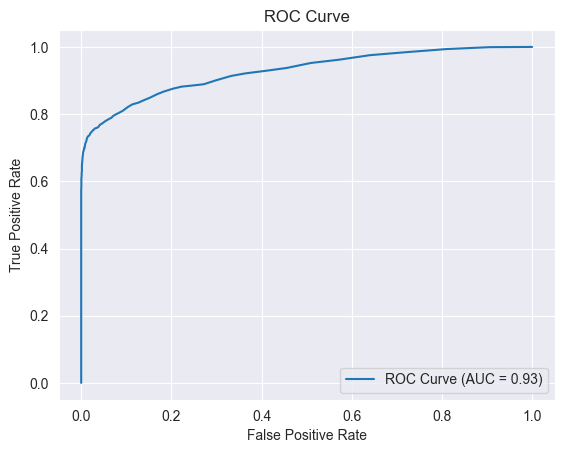

In [41]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


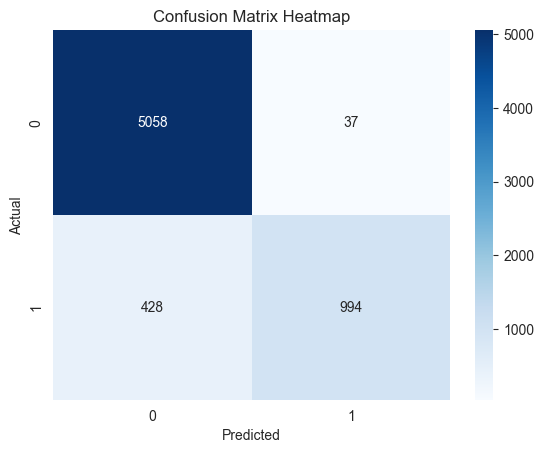

In [42]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [43]:
import pickle
with open("loan_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [44]:
from pycaret.classification import *

clf = setup(
    data=data,
    target='LOAN_STATUS',
    train_size=0.8,
    session_id=42,  # Para reproducibilidad
    normalize=True,  # Normaliza las variables numéricas
    categorical_features=None
)

,Description,Value
0,Session id,42
1,Target,LOAN_STATUS
2,Target type,Binary
3,Original data shape,"(32581, 42)"
4,Transformed data shape,"(32581, 42)"
5,Transformed train set shape,"(26064, 42)"
6,Transformed test set shape,"(6517, 42)"
7,Numeric features,41
8,Preprocess,True
9,Imputation type,simple


In [45]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:49:14
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9372,0.9470,0.7288,0.9774,0.8349,0.7971,0.8102,1.7350
lightgbm,Light Gradient Boosting Machine,0.9364,0.9468,0.7263,0.9760,0.8327,0.7945,0.8078,0.5440
xgboost,Extreme Gradient Boosting,0.9358,0.9451,0.7380,0.9585,0.8338,0.7949,0.8054,0.0730
rf,Random Forest Classifier,0.9284,0.9304,0.7005,0.9608,0.8101,0.7673,0.7820,0.6110
gbc,Gradient Boosting Classifier,0.9272,0.9279,0.7021,0.9515,0.8079,0.7642,0.7777,1.0640
et,Extra Trees Classifier,0.9219,0.9256,0.6848,0.9411,0.7926,0.7460,0.7604,0.2520
ada,Ada Boost Classifier,0.8903,0.8994,0.6780,0.7897,0.7295,0.6611,0.6643,0.2490
dt,Decision Tree Classifier,0.8900,0.8461,0.7682,0.7383,0.7529,0.6822,0.6825,0.0790
lr,Logistic Regression,0.8617,0.8717,0.5332,0.7616,0.6270,0.5454,0.5586,0.4010
knn,K Neighbors Classifier,0.8615,0.8348,0.5062,0.7826,0.6145,0.5347,0.5537,0.0950


In [46]:
import joblib

# Cargar el modelo
model = joblib.load("loan_model.pkl")

# Verificar las features esperadas
if hasattr(model, "feature_names_in_"):
    print("Features esperadas:", model.feature_names_in_)
else:
    print("El modelo no tiene información directa sobre las features.")


Features esperadas: ['PERSON_AGE' 'PERSON_INCOME' 'PERSON_HOME_OWNERSHIP' 'PERSON_EMP_LENGTH'
 'LOAN_INTENT' 'LOAN_GRADE' 'LOAN_AMNT' 'LOAN_INT_RATE'
 'LOAN_PERCENT_INCOME' 'CB_PERSON_DEFAULT_ON_FILE'
 'CB_PERSON_CRED_HIST_LENGTH' 'AGE_GROUP' 'LOAN_TO_INCOME_RATIO'
 'EMP_LENGTH_CATEGORY' 'INTEREST_RATE_RISK' 'CREDIT_HISTORY_CATEGORY'
 'HOME_OWNERSHIP_GROUP' 'HIGH_DEBT_INDICATOR' 'CREDIT_VS_LOAN_DURATION'
 'LOAN_INTENT_CATEGORY' 'CREDIT_CONFIDENCE_LEVEL' 'ADJUSTED_INTEREST_RATE'
 'ESTIMATED_SAVINGS' 'SIMPLIFIED_EMP_LENGTH' 'LOAN_AMOUNT_CATEGORY'
 'HOUSING_EMPLOYMENT_RISK' 'AGE_INTEREST_RISK'
 'ESTIMATED_DAYS_TO_CLEAR_DEBT' 'EARLY_PAYMENT_CAPABILITY'
 'LOAN_INTENSITY_SCORE' 'INCOME_RANGE' 'FINANCIAL_STABILITY_RATIO'
 'HOUSING_DEBT_RISK' 'INTEREST_RATE_ADJUSTED_BY_EMPLOYMENT'
 'AVAILABLE_MONTHLY_PAYMENT' 'CREDIT_RISK_COMBINED' 'OVERALL_LOAN_RISK'
 'ANNUAL_INCOME_DEDICATED_TO_LOAN' 'LOAN_SUSTAINABILITY' 'TOTAL_LOAN_COST'
 'AGE_CREDIT_RISK']


In [54]:
import pandas as pd
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X = data.drop('LOAN_STATUS', axis=1)
y = data['LOAN_STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

categorical_columns = X.select_dtypes(include='object').columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputar valores faltantes
    ('scaler', StandardScaler())  # Escalar datos
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar categorías
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Paso de preprocesamiento
    ('classifier', RandomForestClassifier(random_state=42))  # Modelo de clasificación
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9314101580481817
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5095
           1       0.97      0.71      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



In [55]:
from sklearn.model_selection import GridSearchCV

# Definir parámetros para búsqueda
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Búsqueda en GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Usar el mejor modelo
best_pipeline = grid_search.best_estimator_

# Evaluar el modelo optimizado
y_pred = best_pipeline.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred))


Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Optimized Accuracy: 0.9309498235384379


In [56]:
joblib.dump(pipeline, 'loan_pipeline.pkl')

['loan_pipeline.pkl']

In [2]:
import os
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from dagshub import dagshub_logger

# Configuración para DagsHub y MLflow
repo_url = "repo_dagshub"  # URL del repositorio en DagsHub
username = "user_name"  # Nombre de usuario en DagsHub

# Configuración de URI de MLflow
mlflow.set_tracking_uri(f"{repo_url}.mlflow")

# Si el repositorio es privado, configurar autenticación
os.environ["MLFLOW_TRACKING_USERNAME"] = username
os.environ["MLFLOW_TRACKING_PASSWORD"] = "api_token"

# Supongamos que 'data' ya está cargado como un DataFrame
# data = pd.read_csv("ruta_a_tu_archivo.csv")  # Asegúrate de cargar los datos correctamente

# Separación de características y variable objetivo
X = data.drop('LOAN_STATUS', axis=1)
y = data['LOAN_STATUS']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Definir columnas numéricas y categóricas
categorical_columns = X.select_dtypes(include='object').columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Pipeline de transformación para columnas numéricas
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputar valores faltantes
    ('scaler', StandardScaler())  # Escalar datos
])

# Pipeline de transformación para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar categorías
])

# ColumnTransformer para aplicar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Pipeline completo: preprocesamiento + modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenamiento del modelo
pipeline.fit(X_train, y_train)

# Evaluación del modelo
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Log de parámetros y métricas en MLflow
mlflow.log_param("model_type", "RandomForest")
mlflow.log_param("n_estimators", 100)
mlflow.log_param("random_state", 42)
mlflow.log_metric("accuracy", accuracy)

# Guardar el modelo en MLflow
mlflow.sklearn.log_model(
    pipeline,
    "loan_pipeline",
    registered_model_name="LoanRiskModel"
)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Búsqueda de hiperparámetros con GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Log de mejores parámetros
mlflow.log_param("best_n_estimators", grid_search.best_params_['classifier__n_estimators'])
mlflow.log_param("best_max_depth", grid_search.best_params_['classifier__max_depth'])

print("Best parameters:", grid_search.best_params_)

# Usar el mejor modelo
best_pipeline = grid_search.best_estimator_

# Evaluar el modelo optimizado
y_pred = best_pipeline.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred)

print("Optimized Accuracy:", optimized_accuracy)

# Log de la métrica optimizada
mlflow.log_metric("optimized_accuracy", optimized_accuracy)

# Guardar el modelo optimizado en MLflow
mlflow.sklearn.log_model(
    best_pipeline,
    "optimized_loan_pipeline",
    registered_model_name="LoanRiskModel"
)


2024/11/21 16:03:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LoanRiskModel' already exists. Creating a new version of this model...
2024/11/21 16:04:00 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LoanRiskModel, version 3
Created version '3' of model 'LoanRiskModel'.


Accuracy: 0.9314101580481817
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5095
           1       0.97      0.71      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Optimized Accuracy: 0.9309498235384379


2024/11/21 16:14:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LoanRiskModel' already exists. Creating a new version of this model...
2024/11/21 16:14:28 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LoanRiskModel, version 4
Created version '4' of model 'LoanRiskModel'.
